In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.svm import SVC
from sklearn import tree
import plotly.offline as py
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Research Work\\MyProject\\Online-Shopping-Review\\Dataset\\Online Shopping Review.csv")

# Rename The Column Names

In [3]:
my_cols=["Time","Name","Age","Gender","About Shopping","Shopping For","Finding For",
         "Visiting Issue","Compared to OS","Complacency","Find ERP","Payment Complacency",
         "CheckOut Experience","Product Receive TimeLine","Rider Review","CS Experience"]

In [4]:
df.columns=my_cols

In [5]:
#Using ' ' to replace the column names
columns= list(df.columns)
adder = ""
new_columns =[]
for each_column in columns:
    for letter in each_column:
        if letter==" ":
            adder = adder + "_"
        else:
            adder = adder + letter
    new_columns.append(adder)
    adder=""
new_columns

['Time',
 'Name',
 'Age',
 'Gender',
 'About_Shopping',
 'Shopping_For',
 'Finding_For',
 'Visiting_Issue',
 'Compared_to_OS',
 'Complacency',
 'Find_ERP',
 'Payment_Complacency',
 'CheckOut_Experience',
 'Product_Receive_TimeLine',
 'Rider_Review',
 'CS_Experience']

In [6]:
df.columns=new_columns

In [7]:
df.head()

,Time,Name,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,2022/06/17 12:46:08 AM GMT+6,Rajesh Das,25,Male,Newspaper,Friend,Yes,Product Information,Pricing,Neutral,Yes,Very Safe,3,No,2,3
1,2022/06/17 1:55:46 AM GMT+6,Radhika,22,Female,Social Media,Friend,Yes,Product Information,Website performance,Very satisfied,Yes,Safe,3,Yes,5,5
2,2022/06/17 1:57:37 AM GMT+6,Ritu,21,Female,Social Media,Friend,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
3,2022/06/17 2:01:02 AM GMT+6,Nandini,24,Female,Friend,Parent,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
4,2022/06/17 2:02:39 AM GMT+6,Ranu mondal,30,Female,Social Media,Colleague,Yes,Product Information,Product catalog,Satisfied,Yes,Very Safe,4,Maybe,4,4


# Drop  Unnecessary Columns

In [8]:
df1=df.drop(["Time","Name"],axis=1)

In [9]:
df1.shape

(4026, 14)

Here are 4026 Row and 14 Columns

# Checking data format

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       4026 non-null   int64 
 1   Gender                    4026 non-null   object
 2   About_Shopping            4026 non-null   object
 3   Shopping_For              4026 non-null   object
 4   Finding_For               4026 non-null   object
 5   Visiting_Issue            4026 non-null   object
 6   Compared_to_OS            4026 non-null   object
 7   Complacency               4026 non-null   object
 8   Find_ERP                  4026 non-null   object
 9   Payment_Complacency       4026 non-null   object
 10  CheckOut_Experience       4026 non-null   int64 
 11  Product_Receive_TimeLine  4026 non-null   object
 12  Rider_Review              4026 non-null   int64 
 13  CS_Experience             4026 non-null   int64 
dtypes: int64(4), object(10)


# Basic Statistical Information

In [11]:
df1.describe()

,Age,CheckOut_Experience,Rider_Review,CS_Experience
count,4026.000000,4026.000000,4026.000000,4026.000000
mean,29.962742,4.004719,3.955042,3.614257
std,9.304836,1.069151,1.085748,1.284977
min,8.000000,1.000000,1.000000,1.000000
25%,23.000000,3.000000,3.000000,3.000000
50%,28.000000,4.000000,4.000000,4.000000
75%,34.000000,5.000000,5.000000,5.000000
max,76.000000,5.000000,5.000000,5.000000


# Checking Null Values

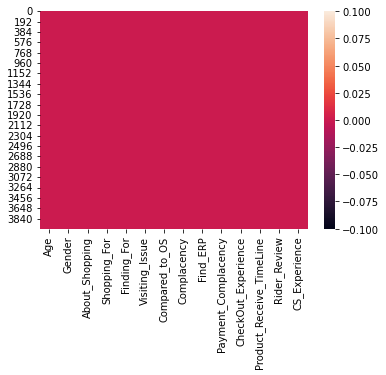

In [12]:
sns.heatmap(df1.isnull())
plt.show()

# Check Any Null Value Columns

In [13]:
df1[df1.isnull().any(axis=1)].head()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience


In [14]:
df1.isnull().sum()

Age                         0
Gender                      0
About_Shopping              0
Shopping_For                0
Finding_For                 0
Visiting_Issue              0
Compared_to_OS              0
Complacency                 0
Find_ERP                    0
Payment_Complacency         0
CheckOut_Experience         0
Product_Receive_TimeLine    0
Rider_Review                0
CS_Experience               0
dtype: int64

In [15]:
print("%18s %20s   %18s %18s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
for col in df1.columns:
    dtyp = df1[col].dtype
    uniq = df1[col].nunique()
    na = df1[col].isna().sum()
    print("%18s %20s %18s %18s" % (col, dtyp, uniq, na))

       Column Name            Data Type            #Distinct          NA Values
               Age                int64                 55                  0
            Gender               object                  3                  0
    About_Shopping               object                  6                  0
      Shopping_For               object                  6                  0
       Finding_For               object                  3                  0
    Visiting_Issue               object                  5                  0
    Compared_to_OS               object                  8                  0
       Complacency               object                  5                  0
          Find_ERP               object                  3                  0
Payment_Complacency               object                  5                  0
CheckOut_Experience                int64                  5                  0
Product_Receive_TimeLine               object               

# Seperate Categorical and Numerical Features

In [16]:
categorical_features=[]
numerical_features=[]

In [17]:
for i in df1.columns.tolist():
    if df1[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [18]:
print("-"*40)
print("Numerical Features")
print("-"*40)
for i in numerical_features:
    print('Feature: ',i)

----------------------------------------
Numerical Features
----------------------------------------
Feature:  Age
Feature:  CheckOut_Experience
Feature:  Rider_Review
Feature:  CS_Experience


In [19]:
print("-"*40)
print("Categorical Features")
print("-"*40)
for i in categorical_features:
    print('Feature:',i)

----------------------------------------
Categorical Features
----------------------------------------
Feature: Gender
Feature: About_Shopping
Feature: Shopping_For
Feature: Finding_For
Feature: Visiting_Issue
Feature: Compared_to_OS
Feature: Complacency
Feature: Find_ERP
Feature: Payment_Complacency
Feature: Product_Receive_TimeLine


# Checking Unique Value Per Column

In [20]:
for col in new_columns[3:]:
    print("-------------------")
    print("Column Name Is",col)
    print("-------------------")
    print(df1[col].unique())  

-------------------
Column Name Is Gender
-------------------
['Male' 'Female' 'Other']
-------------------
Column Name Is About_Shopping
-------------------
['Newspaper' 'Social Media' 'Friend' 'TV' 'Other' 'Search Engine']
-------------------
Column Name Is Shopping_For
-------------------
['Friend' 'Parent' 'Colleague' 'Boss' 'Other' 'Me']
-------------------
Column Name Is Finding_For
-------------------
['Yes' 'Maybe' 'No']
-------------------
Column Name Is Visiting_Issue
-------------------
['Product Information' 'Buying Products' 'Contact Information' 'Other'
 'About Company']
-------------------
Column Name Is Compared_to_OS
-------------------
['Pricing' 'Website performance' 'Product catalog' 'Overall'
 'Product information' 'Shipping options' 'Payment experience'
 'Online help']
-------------------
Column Name Is Complacency
-------------------
['Neutral' 'Very satisfied' 'Satisfied' 'Dissatisfied' 'Very dissatisfied']
-------------------
Column Name Is Find_ERP
-----------

In [21]:
for col in new_columns[3:]:
    print("-------------------")
    print("Column Name Is",col)
    print("-------------------")
    print(df1[col].value_counts())  

-------------------
Column Name Is Gender
-------------------
Female    2116
Male      1904
Other        6
Name: Gender, dtype: int64
-------------------
Column Name Is About_Shopping
-------------------
Social Media     978
Friend           850
Search Engine    836
Newspaper        714
TV               388
Other            260
Name: About_Shopping, dtype: int64
-------------------
Column Name Is Shopping_For
-------------------
Parent       898
Friend       776
Colleague    735
Me           674
Boss         567
Other        376
Name: Shopping_For, dtype: int64
-------------------
Column Name Is Finding_For
-------------------
Yes      1812
Maybe    1144
No       1070
Name: Finding_For, dtype: int64
-------------------
Column Name Is Visiting_Issue
-------------------
Contact Information    947
Product Information    934
Buying Products        919
About Company          856
Other                  370
Name: Visiting_Issue, dtype: int64
-------------------
Column Name Is Compared_to_OS
-

# Co-Relation

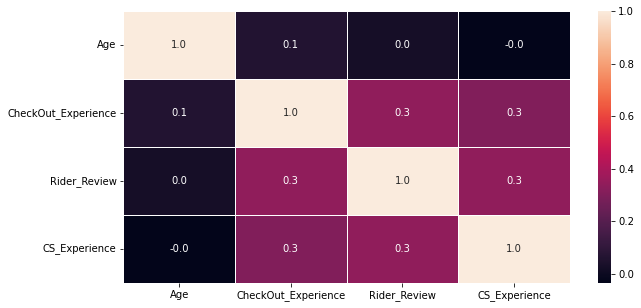

In [22]:
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [23]:
df1.head()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,25,Male,Newspaper,Friend,Yes,Product Information,Pricing,Neutral,Yes,Very Safe,3,No,2,3
1,22,Female,Social Media,Friend,Yes,Product Information,Website performance,Very satisfied,Yes,Safe,3,Yes,5,5
2,21,Female,Social Media,Friend,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
3,24,Female,Friend,Parent,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
4,30,Female,Social Media,Colleague,Yes,Product Information,Product catalog,Satisfied,Yes,Very Safe,4,Maybe,4,4


# Explority Data Analysis ( EDA )

# Age

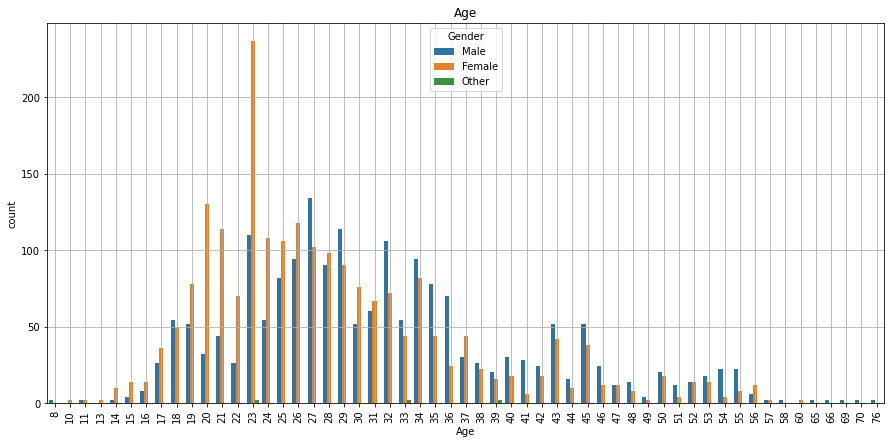

In [24]:
plt.figure(figsize=(15,7))
sns.countplot('Age',data=df1,hue='Gender')
plt.title('Age')
plt.xticks(rotation = 90)
plt.grid(visible=True)
plt.show()

In [25]:
counts=df1["Age"].value_counts()

# Remove the Number of Age Counts Less than 6

In [26]:
df1 = df1[~df1['Age'].isin(counts[counts < 5].index)]

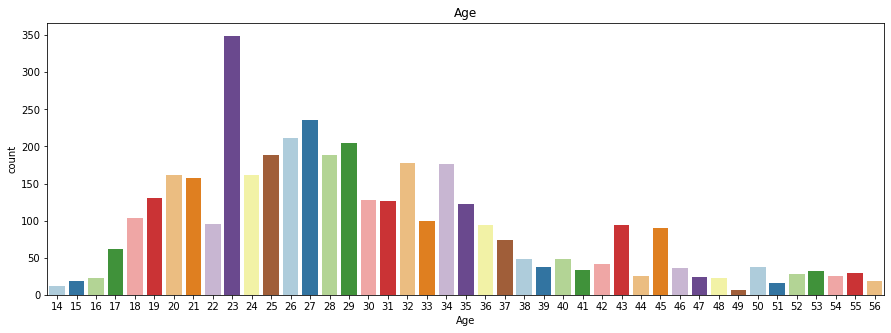

In [27]:
plt.figure(figsize=(15,5))
sns.countplot('Age',data=df1,palette='Paired')
plt.title('Age')
plt.show()

# Payment_Complacency

In [28]:
df1["Payment_Complacency"].value_counts()

Safe           1185
Very Safe      1077
Neutral         886
Not Safe        646
Very Unsafe     204
Name: Payment_Complacency, dtype: int64

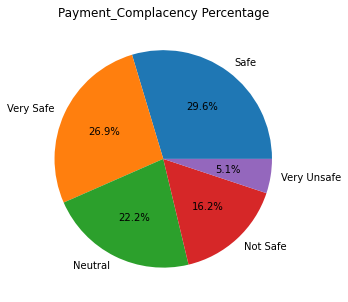

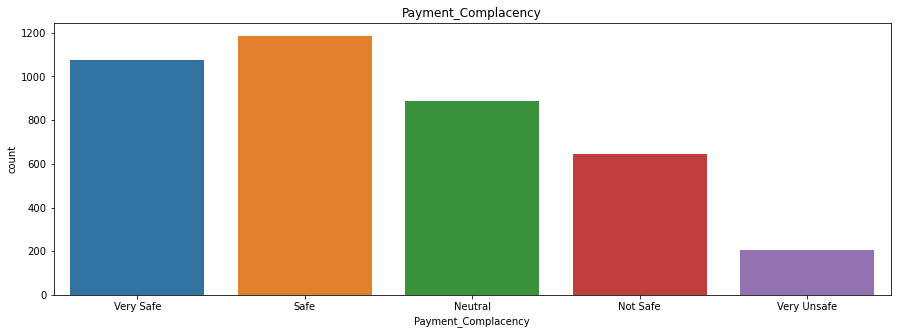

In [29]:
plt.figure(figsize=(5,5))
plt.pie(list(df1["Payment_Complacency"].value_counts()[0:5]),labels=list(df1["Payment_Complacency"].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.title('Payment_Complacency Percentage')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot('Payment_Complacency',data=df1)
plt.title('Payment_Complacency')
plt.show()

# Complacency

In [30]:
df1["Complacency"].value_counts()

Very satisfied       1452
Satisfied            1245
Neutral               725
Dissatisfied          434
Very dissatisfied     142
Name: Complacency, dtype: int64

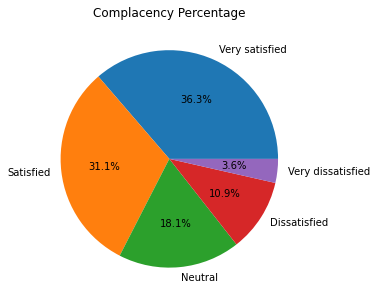

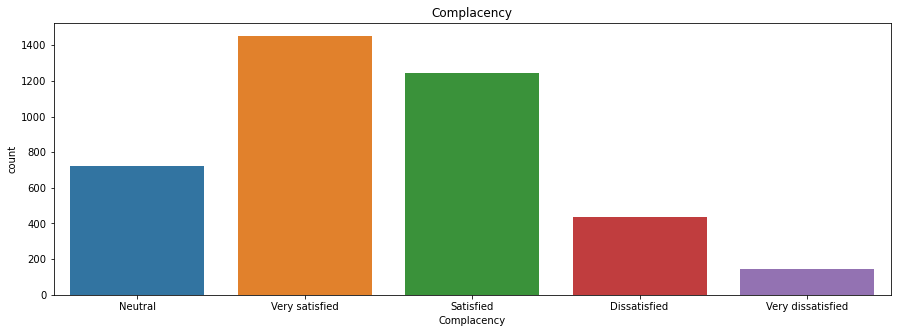

In [31]:
plt.figure(figsize=(5,5))
plt.pie(list(df1["Complacency"].value_counts()[0:5]),labels=list(df["Complacency"].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.title('Complacency Percentage')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot('Complacency',data=df1)
plt.title('Complacency')
plt.show()

# Compared_to_OS

In [32]:
df1["Compared_to_OS"].value_counts()

Product catalog        612
Shipping options       612
Product information    607
Pricing                553
Payment experience     528
Online help            392
Website performance    350
Overall                344
Name: Compared_to_OS, dtype: int64

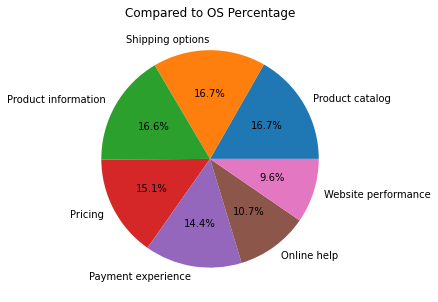

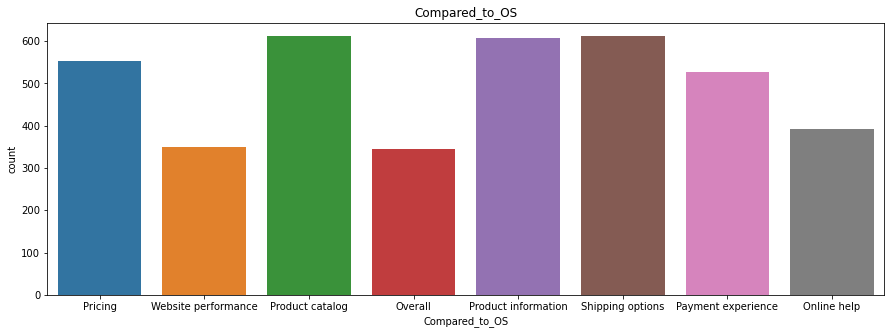

In [33]:
plt.figure(figsize=(5,5))
plt.pie(list(df1["Compared_to_OS"].value_counts()[0:7]),labels=list(df1["Compared_to_OS"].value_counts()[0:7].keys()),autopct='%0.1f%%')
plt.title('Compared to OS Percentage')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot('Compared_to_OS',data=df1)
plt.title('Compared_to_OS')
plt.show()

# Visiting_Issue

In [34]:
df1["Visiting_Issue"].value_counts()

Contact Information    943
Product Information    928
Buying Products        909
About Company          850
Other                  368
Name: Visiting_Issue, dtype: int64

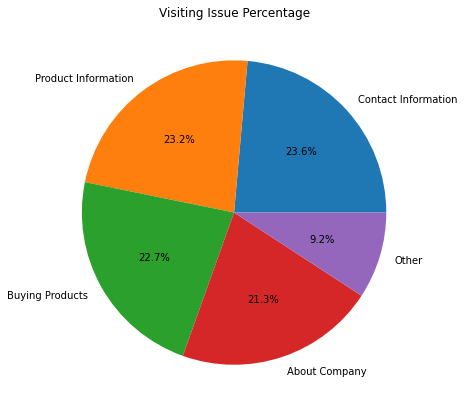

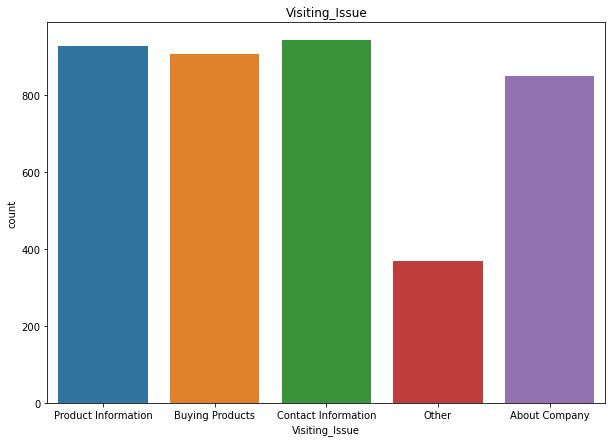

In [35]:
plt.figure(figsize=(10,7))
plt.pie(list(df1["Visiting_Issue"].value_counts()[0:5]),labels=list(df1["Visiting_Issue"].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.title('Visiting Issue Percentage')
plt.show()

plt.figure(figsize=(10,7))
sns.countplot('Visiting_Issue',data=df1)
plt.title('Visiting_Issue')
plt.show()

# About_Shopping

In [36]:
df1["About_Shopping"].value_counts()

Social Media     974
Friend           844
Search Engine    836
Newspaper        708
TV               378
Other            258
Name: About_Shopping, dtype: int64

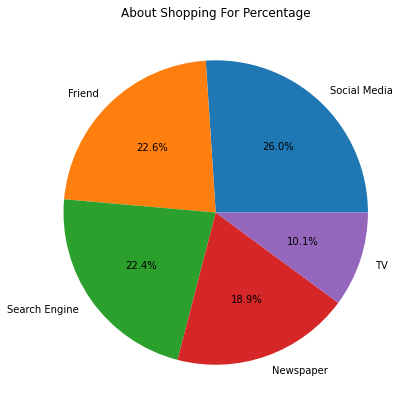

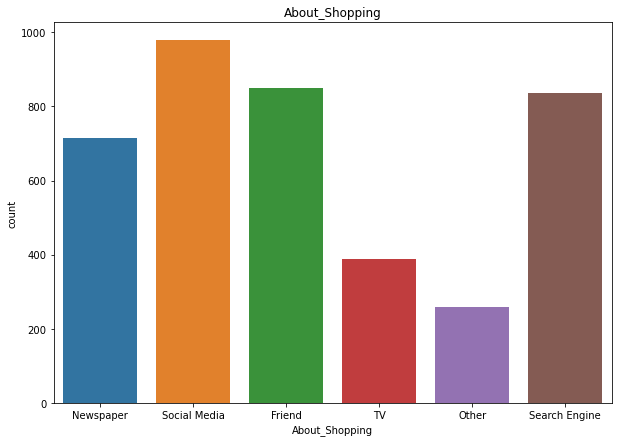

In [37]:
plt.figure(figsize=(10,7))
plt.pie(list(df1["About_Shopping"].value_counts()[0:5]),labels=list(df1["About_Shopping"].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.title('About Shopping For Percentage')
plt.show()

plt.figure(figsize=(10,7))
sns.countplot('About_Shopping',data=df)
plt.title('About_Shopping')
plt.show()

In [38]:
df1["Gender"].value_counts()

Female    2106
Male      1886
Other        6
Name: Gender, dtype: int64

In [39]:
df1.drop(df1[(df1['Gender'] =="Other")].index, inplace=True)

In [40]:
df1["Gender"].value_counts()

Female    2106
Male      1886
Name: Gender, dtype: int64

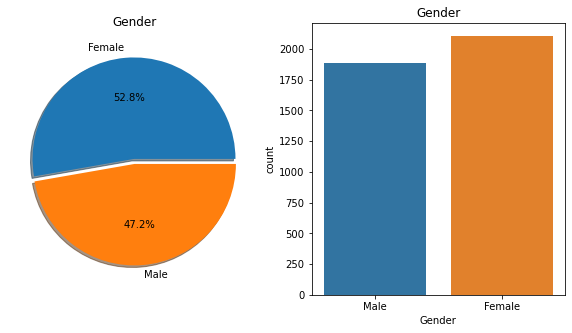

In [41]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df1['Gender'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
ax[0].set_ylabel('')
sns.countplot('Gender',data=df1,ax=ax[1])
ax[1].set_title('Gender')
plt.show()

In [42]:
df1["Shopping_For"].value_counts()

Parent       894
Friend       776
Colleague    727
Me           654
Boss         567
Other        374
Name: Shopping_For, dtype: int64

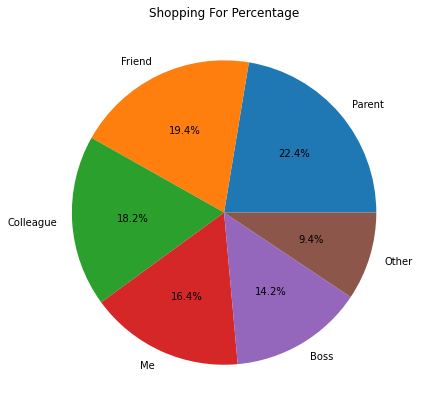

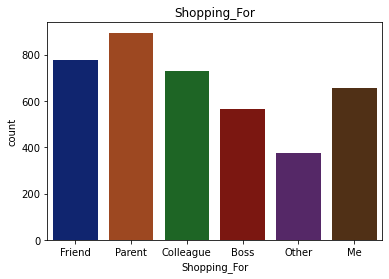

In [43]:
plt.figure(figsize=(7,7))
plt.pie(list(df1["Shopping_For"].value_counts()[0:6]),labels=list(df1["Shopping_For"].value_counts()[0:6].keys()),autopct='%0.1f%%')
plt.title('Shopping For Percentage')
plt.show()

sns.countplot('Shopping_For',data=df1,palette='dark')
plt.title('Shopping_For')
plt.show()

# Separate X and Y

In [44]:
target=df1["Complacency"]

In [45]:
features=df1.drop(["Complacency"],axis=1)

In [46]:
features.columns

Index(['Age', 'Gender', 'About_Shopping', 'Shopping_For', 'Finding_For',
       'Visiting_Issue', 'Compared_to_OS', 'Find_ERP', 'Payment_Complacency',
       'CheckOut_Experience', 'Product_Receive_TimeLine', 'Rider_Review',
       'CS_Experience'],
      dtype='object')

In [47]:
Features_categorical_features=[]
Features_numerical_features=[]

In [48]:
for i in features.columns.tolist():
    if features[i].dtype=="object":
        Features_categorical_features.append(i)
    else:
        Features_numerical_features.append(i)

In [49]:
Features_numerical_features

['Age', 'CheckOut_Experience', 'Rider_Review', 'CS_Experience']

In [50]:
Features_categorical_features

['Gender',
 'About_Shopping',
 'Shopping_For',
 'Finding_For',
 'Visiting_Issue',
 'Compared_to_OS',
 'Find_ERP',
 'Payment_Complacency',
 'Product_Receive_TimeLine']

In [51]:
le=LabelEncoder()
for i in Features_categorical_features:
    features[i]=le.fit_transform(features[i])

In [52]:
features.head()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,25,1,1,2,2,4,3,2,3,3,1,2,3
1,22,0,4,2,2,4,7,2,2,3,2,5,5
2,21,0,4,2,2,1,7,2,2,5,2,5,5
3,24,0,0,5,2,1,7,2,2,5,2,5,5
4,30,0,4,1,2,4,4,2,3,4,0,4,4


# Feature Selection

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
fit_features = test.fit(features,target)
score_col=pd.DataFrame(fit_features.scores_,columns=["Score_Value"])

In [54]:
score_col.head()

,Score_Value
0,12.895992
1,13.293842
2,2.068506
3,1.051593
4,12.172703


In [55]:
Name_col=pd.DataFrame(features.columns)
Name_col

,0
0,Age
1,Gender
2,About_Shopping
3,Shopping_For
4,Finding_For
5,Visiting_Issue
6,Compared_to_OS
7,Find_ERP
8,Payment_Complacency
9,CheckOut_Experience


In [56]:
top_features=pd.concat([Name_col,score_col],axis=1)
top_features

,0,Score_Value
0,Age,12.895992
1,Gender,13.293842
2,About_Shopping,2.068506
3,Shopping_For,1.051593
4,Finding_For,12.172703
5,Visiting_Issue,6.059322
6,Compared_to_OS,32.164739
7,Find_ERP,5.672012
8,Payment_Complacency,13.094801
9,CheckOut_Experience,23.286876


In [57]:
top_features.columns=["Name","Score Value"]

In [58]:
top_features.sort_values( by = 'Score Value' , ascending = False , inplace = True)
top_features

,Name,Score Value
6,Compared_to_OS,32.164739
9,CheckOut_Experience,23.286876
10,Product_Receive_TimeLine,16.760688
1,Gender,13.293842
8,Payment_Complacency,13.094801
0,Age,12.895992
12,CS_Experience,12.886671
11,Rider_Review,12.766060
4,Finding_For,12.172703
5,Visiting_Issue,6.059322


In [59]:
features.dtypes

Age                         int64
Gender                      int32
About_Shopping              int32
Shopping_For                int32
Finding_For                 int32
Visiting_Issue              int32
Compared_to_OS              int32
Find_ERP                    int32
Payment_Complacency         int32
CheckOut_Experience         int64
Product_Receive_TimeLine    int32
Rider_Review                int64
CS_Experience               int64
dtype: object

# Dropping Less Importants Column

In [60]:
top_features=features.drop(["Shopping_For","About_Shopping","Find_ERP","Visiting_Issue","Finding_For"],axis=1)

In [61]:
top_features.head()

,Age,Gender,Compared_to_OS,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,25,1,3,3,3,1,2,3
1,22,0,7,2,3,2,5,5
2,21,0,7,2,5,2,5,5
3,24,0,7,2,5,2,5,5
4,30,0,4,3,4,0,4,4


# Normalization of the Dataset

In [62]:
from sklearn.preprocessing import StandardScaler
X_norm=StandardScaler().fit_transform(top_features)
X_norm[0:5]

array([[-5.40037370e-01,  1.05671614e+00, -3.17286898e-01,
         1.01789222e+00, -9.34875669e-01, -5.79553144e-01,
        -1.79957325e+00, -4.75973434e-01],
       [-8.73791501e-01, -9.46327936e-01,  1.57883481e+00,
         1.92160510e-01, -9.34875669e-01,  7.15842237e-01,
         9.65236145e-01,  1.08083603e+00],
       [-9.85042878e-01, -9.46327936e-01,  1.57883481e+00,
         1.92160510e-01,  9.32536726e-01,  7.15842237e-01,
         9.65236145e-01,  1.08083603e+00],
       [-6.51288747e-01, -9.46327936e-01,  1.57883481e+00,
         1.92160510e-01,  9.32536726e-01,  7.15842237e-01,
         9.65236145e-01,  1.08083603e+00],
       [ 1.62195144e-02, -9.46327936e-01,  1.56743528e-01,
         1.01789222e+00, -1.16947169e-03, -1.87494852e+00,
         4.36330140e-02,  3.02431297e-01]])

In [63]:
# top_features.head()

In [64]:
accuracy=[]
f1=[]
model=[]
precision=[]
support=[]

In [65]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(X_norm,target,test_size=0.2,random_state=1)

# Support Vector Machine

In [67]:
svc=SVC()
svc.fit(xtrain,ytrain)
trainpredict = svc.predict(xtrain)
testpredict = svc.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)
accuracy.append(np.round(accuracy_score(ytest,testpredict),2))

f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))

model.append('Support Vector Machine')

--------------------------------------------------------------------------
Classification Report for Train Data
                   precision    recall  f1-score   support

     Dissatisfied       0.61      0.09      0.15       344
          Neutral       0.60      0.24      0.34       571
        Satisfied       0.48      0.51      0.50       982
Very dissatisfied       1.00      0.02      0.03       113
   Very satisfied       0.51      0.81      0.62      1183

         accuracy                           0.51      3193
        macro avg       0.64      0.33      0.33      3193
     weighted avg       0.55      0.51      0.46      3193

Classification Report for Test Data
                   precision    recall  f1-score   support

     Dissatisfied       0.15      0.02      0.04        88
          Neutral       0.50      0.15      0.23       154
        Satisfied       0.42      0.43      0.43       263
Very dissatisfied       0.00      0.00      0.00        27
   Very satisfied     

# K-Neighbors Classifier

In [68]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(xtrain, ytrain)

trainpredict = KNN.predict(xtrain)
testpredict = KNN.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))

f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))

model.append('K-Neighbors Classifier')

--------------------------------------------------------------------------
Classification Report for Train Data
                   precision    recall  f1-score   support

     Dissatisfied       0.99      0.98      0.99       344
          Neutral       0.99      0.99      0.99       571
        Satisfied       0.98      0.99      0.99       982
Very dissatisfied       1.00      1.00      1.00       113
   Very satisfied       0.99      0.98      0.99      1183

         accuracy                           0.99      3193
        macro avg       0.99      0.99      0.99      3193
     weighted avg       0.99      0.99      0.99      3193

Classification Report for Test Data
                   precision    recall  f1-score   support

     Dissatisfied       0.90      0.86      0.88        88
          Neutral       0.89      0.86      0.87       154
        Satisfied       0.86      0.85      0.86       263
Very dissatisfied       0.76      0.93      0.83        27
   Very satisfied     

# Gaussian Naive Bayes

In [69]:
GNB = GaussianNB()
GNB.fit(xtrain, ytrain)

trainpredict = GNB.predict(xtrain)
testpredict = GNB.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))
model.append('Gaussian Naive Bayes')

--------------------------------------------------------------------------
Classification Report for Train Data
                   precision    recall  f1-score   support

     Dissatisfied       0.18      0.07      0.10       344
          Neutral       0.30      0.23      0.26       571
        Satisfied       0.35      0.23      0.28       982
Very dissatisfied       0.62      0.04      0.08       113
   Very satisfied       0.44      0.72      0.54      1183

         accuracy                           0.39      3193
        macro avg       0.38      0.26      0.25      3193
     weighted avg       0.36      0.39      0.35      3193

Classification Report for Test Data
                   precision    recall  f1-score   support

     Dissatisfied       0.14      0.06      0.08        88
          Neutral       0.33      0.25      0.28       154
        Satisfied       0.33      0.22      0.26       263
Very dissatisfied       0.50      0.04      0.07        27
   Very satisfied     

# Decision Tree Classifier

In [70]:
dst=tree.DecisionTreeClassifier(criterion='entropy')
dst.fit(xtrain,ytrain)

trainpredict = dst.predict(xtrain)
testpredict = dst.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))
model.append('Decision Tree Classifier')

--------------------------------------------------------------------------
Classification Report for Train Data
                   precision    recall  f1-score   support

     Dissatisfied       0.97      0.99      0.98       344
          Neutral       0.99      1.00      0.99       571
        Satisfied       0.98      0.99      0.99       982
Very dissatisfied       1.00      1.00      1.00       113
   Very satisfied       1.00      0.98      0.99      1183

         accuracy                           0.99      3193
        macro avg       0.99      0.99      0.99      3193
     weighted avg       0.99      0.99      0.99      3193

Classification Report for Test Data
                   precision    recall  f1-score   support

     Dissatisfied       0.94      0.86      0.90        88
          Neutral       0.79      0.87      0.83       154
        Satisfied       0.83      0.80      0.82       263
Very dissatisfied       0.81      0.93      0.86        27
   Very satisfied     

# Random Forest Classifier

In [71]:
RF_CL = RandomForestClassifier()
RF_CL.fit(xtrain, ytrain)

trainpredict = RF_CL.predict(xtrain)
testpredict = RF_CL.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))
model.append('Random Forest')

--------------------------------------------------------------------------
Classification Report for Train Data
                   precision    recall  f1-score   support

     Dissatisfied       0.98      0.98      0.98       344
          Neutral       0.99      1.00      0.99       571
        Satisfied       0.99      0.99      0.99       982
Very dissatisfied       1.00      1.00      1.00       113
   Very satisfied       0.99      0.98      0.99      1183

         accuracy                           0.99      3193
        macro avg       0.99      0.99      0.99      3193
     weighted avg       0.99      0.99      0.99      3193

Classification Report for Test Data
                   precision    recall  f1-score   support

     Dissatisfied       0.95      0.84      0.89        88
          Neutral       0.89      0.87      0.88       154
        Satisfied       0.85      0.84      0.85       263
Very dissatisfied       0.86      0.93      0.89        27
   Very satisfied     

In [72]:
model

['Support Vector Machine',
 'K-Neighbors Classifier',
 'Gaussian Naive Bayes',
 'Decision Tree Classifier',
 'Random Forest']

In [74]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'Precision':precision,
                    'F1 score':f1})

In [75]:
output

,Model,Accuracy,Precision,F1 score
0,Support Vector Machine,0.43,0.55,0.38
1,K-Neighbors Classifier,0.87,0.99,0.87
2,Gaussian Naive Bayes,0.37,0.36,0.33
3,Decision Tree Classifier,0.84,0.99,0.84
4,Random Forest,0.86,0.99,0.87
